In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [4]:
import cupy as cp

In [5]:
from dotmap import DotMap

In [6]:
PROJECT_PATH = '../'
DATA_DIR = "/home/swei20/AE/data/"
PCA_PATH = '/scratch/ceph/dobos/data/pfsspec/import/stellar/rbf/bosz_5000_full/pca/spectra.h5'
NORM_PATH = "/scratch/ceph/szalay/swei20/AE/norm_flux_step4.h5"
sys.path.insert(0, PROJECT_PATH)

In [7]:
# os.environ["CUDA_VISIBLE_DEVICES"] = "2"

### Load data

In [8]:
with h5py.File(NORM_PATH, 'r') as f:
    flux0 = f['flux'][()]
    para0 = f['para'][()]
    wave0 = f['wave'][()]

In [9]:
flux0.shape, wave0.shape

((116614, 3850), (3850,))

In [22]:
# from lv.base.dataloader import DataLoader
from lv.base.dataloader_c import DataLoader

In [23]:
ds = DataLoader()

In [24]:
ds.prepare_data (flux0, wave0, para0, "H", "H", fix_CO=0)

Cupy flux: 80442, wave: 1214


In [26]:
mask0=ds.get_major(k=5, q=0.6, niter=2)

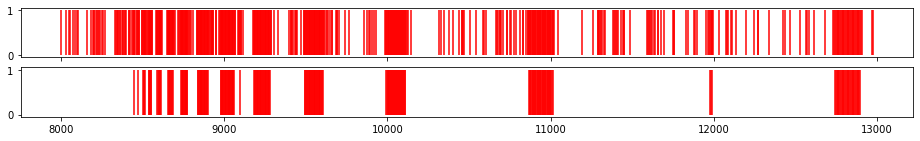

In [28]:
ds.plot_eroded_mask(mask0)

In [30]:
ds.get_MN(ds.mask, top=5)

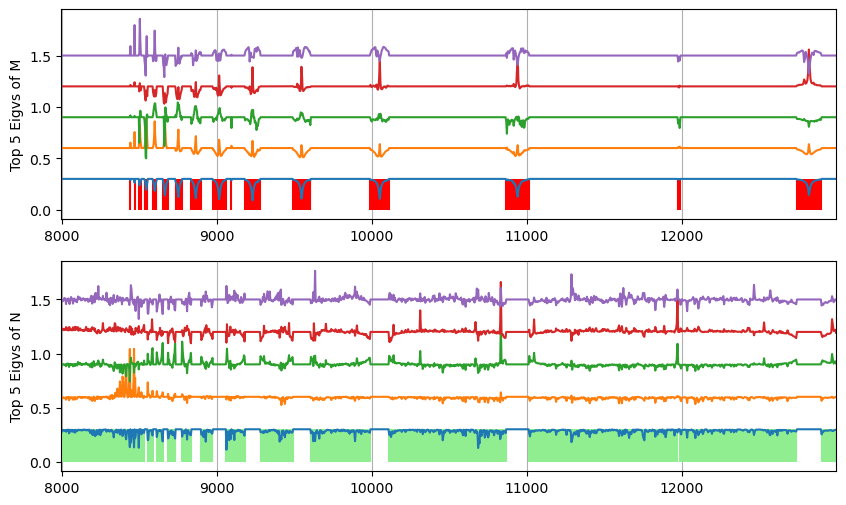

In [62]:
f, axs = plt.subplots(2,1,figsize=(10,6))
ds.plot_MN(step=0.3, axs=axs)

In [36]:
ML, MS, MLv, MSv = ds._pcp(ds.M, delta=1e-6, mu=None, lam=None, norm=None, maxiter=500)

14.916042 0.003525807279719099 329702.1


In [38]:
PCP_PATH = '/scratch/ceph/szalay/swei20/AE/PCP_HH.h5'

In [44]:
# with h5py.File(PCP_PATH, 'w') as f:
#     f.create_dataset("flux", data=cp.asnumpy(ds.flux), shape=ds.flux.shape)
#     f.create_dataset("wave", data=cp.asnumpy(ds.wave), shape=ds.wave.shape)
#     f.create_dataset("para", data=paraa, shape=paraa.shape) 
#     f.create_dataset("ML", data=cp.asnumpy(ML), shape=ML.shape)
#     f.create_dataset("MS", data=cp.asnumpy(MS), shape=MS.shape)
#     f.create_dataset("MLv", data=cp.asnumpy(MLv), shape=MLv.shape) 
#     f.create_dataset("MSv", data=cp.asnumpy(MSv), shape=MSv.shape) 

    

In [ ]:
ML, MS, MLv, MSv

In [56]:
plt.style.use("default")

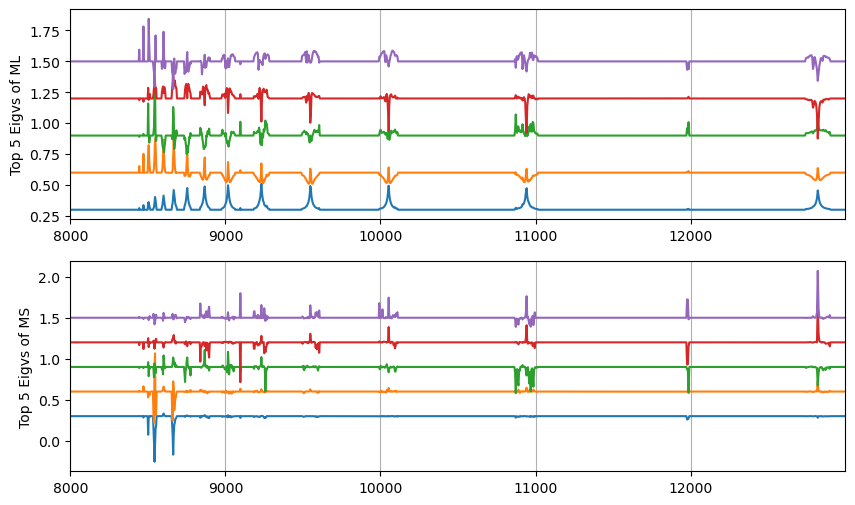

In [58]:
f, axs = plt.subplots(2,1,figsize=(10,6), facecolor="w")
ds.plot_eigv(MLv, name="ML", ax=axs[0])
ds.plot_eigv(MSv, name="MS", ax=axs[1])

In [72]:
_,_,NLv,_ = ds._pcp(ds.N, delta=1e-6, mu=None, lam=None, norm=None, maxiter=10)

60.859837 0.003525807279719099 13930.383


In [74]:
NLv.shape

(276, 1214)

In [45]:
NL, NS, NLv, NSv = ds._pcp(ds.N, delta=1e-6, mu=None, lam=None, norm=None, maxiter=500)

60.859837 0.003525807279719099 13930.383


In [46]:
# with h5py.File(PCP_PATH, 'a') as f:
#     f.create_dataset("NL", data=cp.asnumpy(NL), shape=NL.shape)
#     f.create_dataset("NS", data=cp.asnumpy(NS), shape=NS.shape)
#     f.create_dataset("NLv", data=cp.asnumpy(NLv), shape=NLv.shape) 
#     f.create_dataset("NSv", data=cp.asnumpy(NSv), shape=NSv.shape) 

In [79]:
with h5py.File(PCP_PATH, 'r') as f:
    NLv = f['NLv'][()]

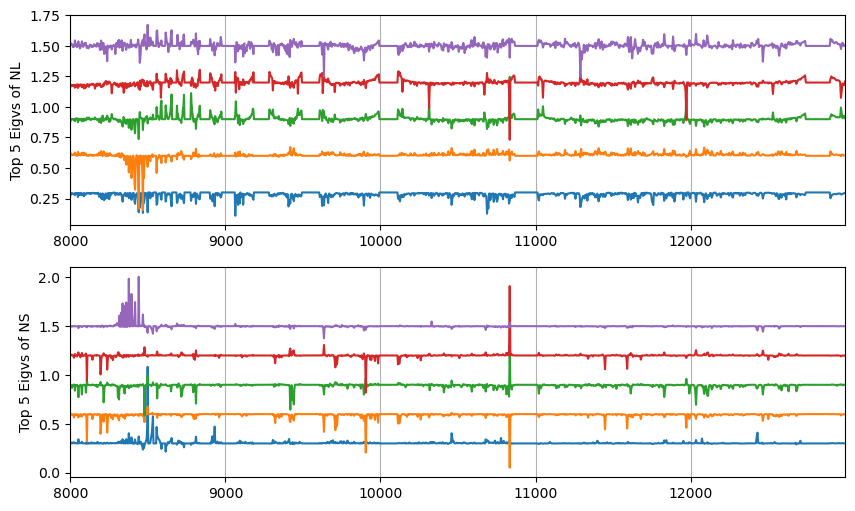

In [63]:
f, axs = plt.subplots(2,1,figsize=(10,6), facecolor="w")
ds.plot_eigv(NLv, name="NL", ax=axs[0])
ds.plot_eigv(NSv, name="NS", ax=axs[1])

In [65]:
NSv.shape

(5, 1214)

In [67]:
NLv.shape

(405, 1214)

In [69]:
NSv.shape

(5, 1214)

In [82]:
pcp20 = cp.vstack([MLv[:5],MSv,NLv[:5],NSv])

In [84]:
pcp20.shape

(20, 1214)

In [93]:
flux20 = cp.dot(ds.flux, pcp20.T)

In [94]:
flux20.shape

(80442, 20)

In [90]:
PCP20_PATH = '/scratch/ceph/szalay/swei20/AE/PCP_FLUX_HH20.h5'

In [131]:
paraa.shape

(80442, 5)

In [132]:
with h5py.File(PCP20_PATH, 'w') as f:
    f.create_dataset("flux", data=nflux20, shape=nflux20.shape)
    f.create_dataset("para", data=paraa, shape=paraa.shape)


In [96]:
nflux20 = cp.asnumpy(flux20)

In [98]:
for i in range(20):
    ds.dfpara[f"p{i}"] = nflux20[:,i]

In [99]:
df = ds.dfpara

In [101]:
import seaborn as sns

In [ ]:
#4,9

In [121]:
Tss = ["p1", "p9", "p4", "p12"]

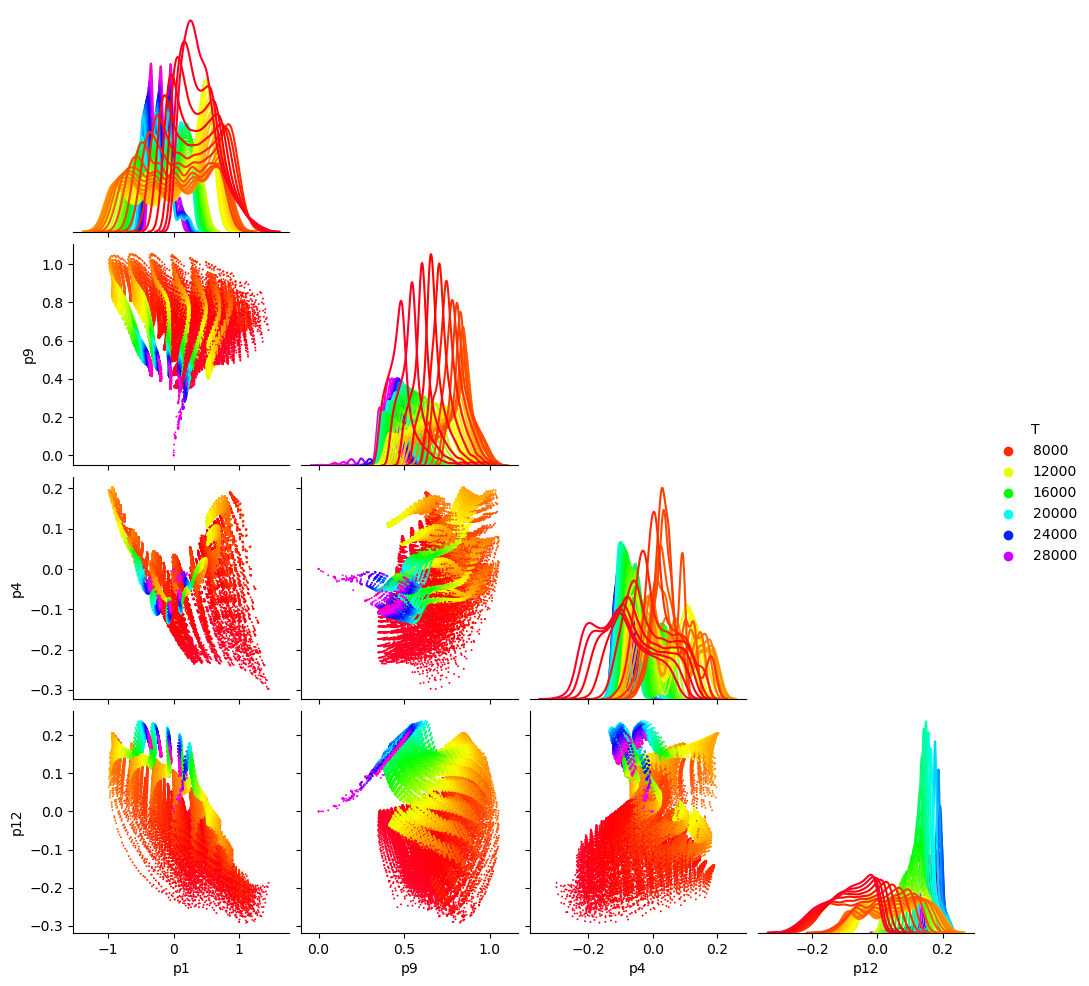

In [122]:
sns.pairplot(
    df,
    x_vars=Tss,
    y_vars=Tss,
    hue="T",
    plot_kws=dict(marker="o", s=2, edgecolor="none"),
    diag_kws=dict(fill=False),
    palette="gist_rainbow",
    corner=True
)

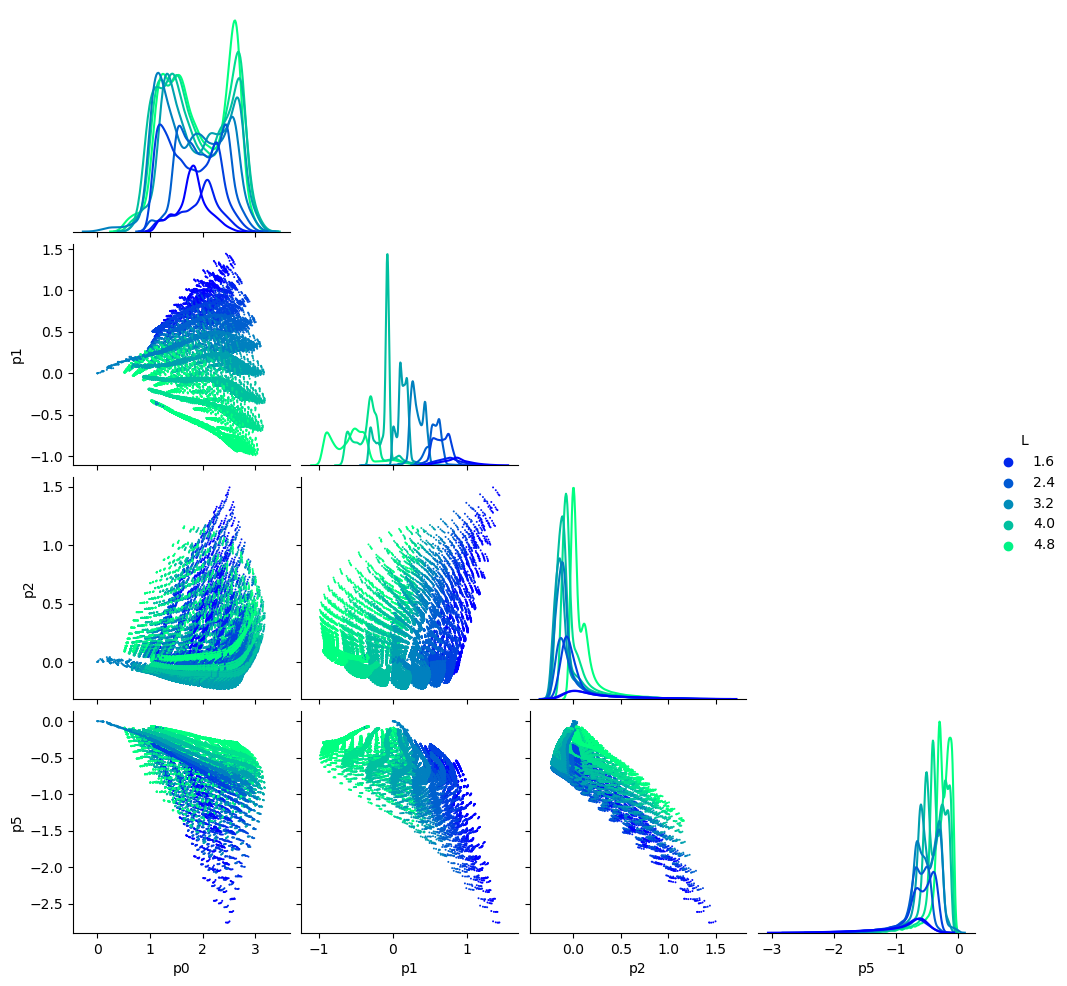

In [107]:
sns.pairplot(
    df,
    x_vars=["p0","p1","p2","p5"],
    y_vars=["p0","p1","p2","p5"],
    hue="L",
    plot_kws=dict(marker="o", s=2, edgecolor="none"),
    diag_kws=dict(fill=False),
    palette="winter",
    corner=True
)

In [100]:
df

,F,T,L,C,O,p0,p1,p2,p3,p4,...,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19
2505,-2.50,6500.0,1.0,-0.50,-0.25,1.128136,0.499648,0.036838,-0.196974,0.081386,...,-0.135200,-0.240935,-0.071858,-0.020589,0.027230,0.069586,-0.019903,-0.030446,0.003281,0.233724
2506,-2.50,6500.0,1.0,-0.50,0.00,1.133586,0.506791,0.049035,-0.191706,0.077841,...,-0.139503,-0.240090,-0.073487,-0.021476,0.028476,0.073180,-0.020825,-0.033335,0.004206,0.233356
2507,-2.50,6500.0,1.0,-0.50,0.25,1.141074,0.515897,0.065249,-0.184368,0.072868,...,-0.145595,-0.237960,-0.075526,-0.022875,0.030216,0.077724,-0.022391,-0.037493,0.005415,0.232405
2508,-2.50,6500.0,1.0,-0.50,0.50,1.150952,0.528012,0.087168,-0.174479,0.066188,...,-0.153512,-0.235022,-0.078318,-0.024464,0.032376,0.083260,-0.024282,-0.042887,0.007152,0.231194
2509,-2.50,6500.0,1.0,-0.25,-0.25,1.128211,0.499715,0.037395,-0.196888,0.081358,...,-0.140768,-0.239359,-0.073590,-0.019091,0.024381,0.070400,-0.020398,-0.030844,0.003080,0.234117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116609,0.75,30000.0,5.0,0.25,0.50,1.068700,-0.355313,0.059830,-0.221402,-0.021413,...,-0.190863,0.025391,0.189177,-0.114144,-0.064251,0.039590,-0.307710,0.015562,-0.066573,0.000568
116610,0.75,30000.0,5.0,0.50,-0.25,1.046908,-0.325783,0.036727,-0.228807,-0.047633,...,-0.128441,0.011566,0.163596,-0.124283,-0.035489,0.028922,-0.239494,0.034514,-0.031271,0.003913
116611,0.75,30000.0,5.0,0.50,0.00,1.051465,-0.330723,0.042487,-0.227484,-0.041839,...,-0.143018,0.015042,0.169225,-0.122860,-0.042253,0.031656,-0.261197,0.030963,-0.044928,0.003365
116612,0.75,30000.0,5.0,0.50,0.25,1.057335,-0.337842,0.050818,-0.225474,-0.033938,...,-0.164157,0.020401,0.176835,-0.120683,-0.051477,0.035457,-0.289490,0.024852,-0.061715,0.002480


In [ ]:
plt.plot(nflux20[:])

In [124]:
import cuml

In [125]:
from cuml import UMAP

In [128]:
umap_dim = 8
u = UMAP(n_neighbors=500, n_components=umap_dim)

In [127]:
flux20.shape

(80442, 20)

In [129]:
uu = u.fit_transform(flux20)

MemoryError: std::bad_alloc: CUDA error at: /datascope/slurm/miniconda3/envs/ae-tf/include/rmm/mr/device/cuda_memory_resource.hpp:69: cudaErrorMemoryAllocation out of memory